In [170]:
import warnings
warnings.filterwarnings("ignore")
import findspark
findspark.init()
import os
import math
import numpy as np
import pandas as pd
import pickle
import re
from time import time
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose

In [172]:
nyc_evictions_ts_df = pd.read_csv("../data/processed/nyc_processed_timeseries_2017_to_2019_20210225.csv")
hills_evictions_ts_df = pd.read_csv("../data/processed/hillsborough_fl_processed_timeseries_2017_to_2019_20210225.csv")

In [304]:
def time_series_plot(df, title, col):
    
    #ts_df = df[df["type"] == "total-lien-foreclosures"]
    plt.figure(figsize = (10, 5))
    ax = sb.lineplot(x = "month", y = col, estimator = None, lw = 1, \
                     marker = "o", data = df)

    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 2))
    plt.xticks(rotation = 90)
    plt.title(label = title)
    plt.ylabel("Amount")
    plt.show()
    return


In [316]:
def timeeseries_decomp_plot(df, col1, col2):
    df["month2"] = pd.to_datetime(df["month"])
    df = df.set_index("month2")
    df.rename(columns = {col1: col2}, inplace = True)
    result = seasonal_decompose(df[col2], model='additive')
    result.plot()
    plt.show()
    return

## NYC

In [15]:
nyc_evictions_ts_df.head()

,month,total-eviction-filings,eviction-filings
0,2017-01,2055,7088.696665
1,2017-02,1567,5141.687390
2,2017-03,1888,6457.768069
3,2017-04,1706,5807.294400
4,2017-05,1912,6375.899266


### Plot evictions NYC

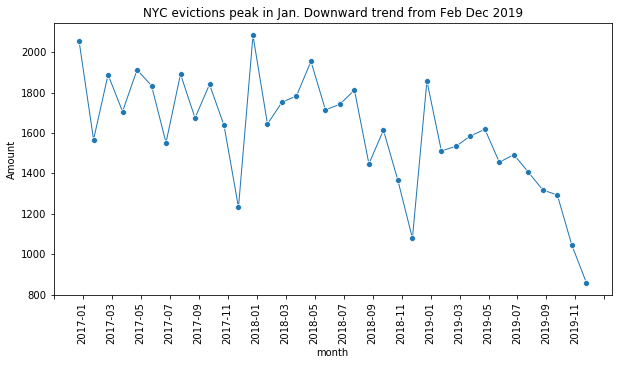

In [312]:
time_series_plot(nyc_evictions_ts_df, \
                 "NYC evictions peak in Jan. Downward trend from Feb Dec 2019", \
                "total-eviction-filings")

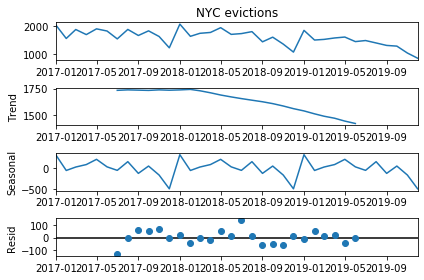

In [317]:
timeeseries_decomp_plot(nyc_evictions_ts_df, "total-eviction-filings", "NYC evictions")

NYC evictions:
Evictions peak in Jan. Downward trend in evictions started in feb 2018 and continued through 2019

## Hillsborough

In [24]:
hills_evictions_ts_df.head()

,month,total-eviction-filings,total-foreclosures,total-lien-foreclosures,evictions
0,2017-01,1065,119,92,548.823834
1,2017-02,1112,175,84,571.479204
2,2017-03,852,221,93,437.006351
3,2017-04,621,222,104,318.421217
4,2017-05,781,241,119,398.590574


In [174]:
# Rearrange dataframe into long format - so that total-eviction-filings, total-foreclosures, 
# total-lien-foreclosures are rows

hills_evictions_ts_df2 = pd.melt(hills_evictions_ts_df.reset_index(), var_name='type', \
        value_vars=['total-foreclosures', \
                    'total-lien-foreclosures', 'evictions'],\
        id_vars='month')

In [27]:
hills_evictions_ts_df2.head()

,month,type,value
0,2017-01,total-eviction-filings,1065.0
1,2017-02,total-eviction-filings,1112.0
2,2017-03,total-eviction-filings,852.0
3,2017-04,total-eviction-filings,621.0
4,2017-05,total-eviction-filings,781.0


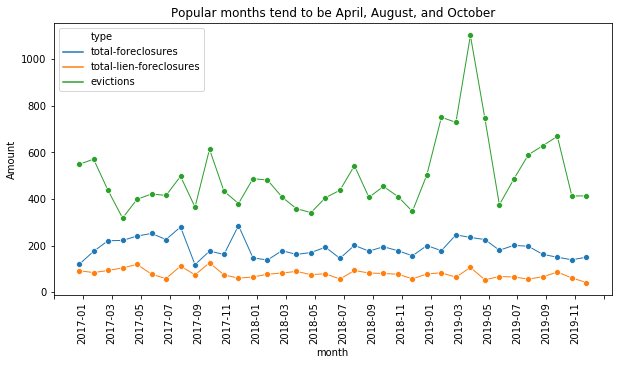

In [175]:
plt.figure(figsize = (10, 5))
ax = sb.lineplot(x = "month", y = "value", hue = "type", estimator = None, lw = 1, \
                 marker = "o", data = hills_evictions_ts_df2)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 2))
plt.xticks(rotation = 90)
plt.title(label = "Popular months tend to be April, August, and October")
plt.ylabel("Amount")
plt.show()

### Plot tax liens in Hillsborough

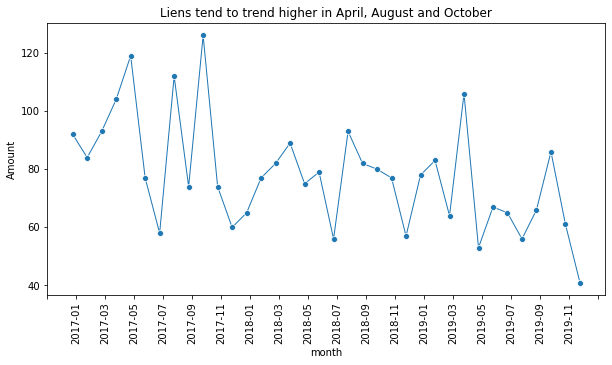

In [305]:
hills_lien_df = hills_evictions_ts_df2[hills_evictions_ts_df2["type"] == "total-lien-foreclosures"]
time_series_plot(hills_lien_df, "Liens tend to trend higher in April, August and October", 
                 "value")

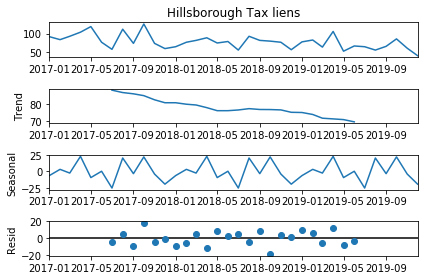

In [318]:
timeeseries_decomp_plot(hills_lien_df, "value", "Hillsborough Tax liens")

Hillsborough Tax liens:
Higher tax liens in April, August and October. Small downward trend in tax liens

### Plot foreclosures in Hillsborough

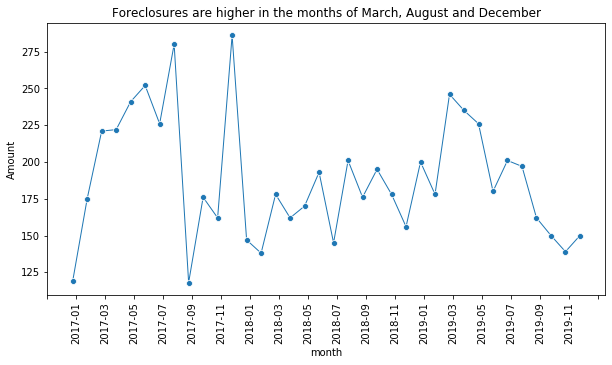

In [306]:
hills_foreclosures_df = hills_evictions_ts_df2[hills_evictions_ts_df2["type"] == "total-foreclosures"]
time_series_plot(hills_foreclosures_df, \
                 "Foreclosures are higher in the months of March, August and December", \
                "value")

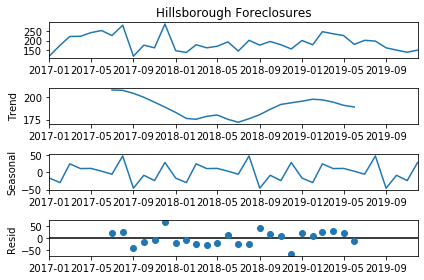

In [319]:
timeeseries_decomp_plot(hills_foreclosures_df, "value", "Hillsborough Foreclosures")

Hillsborough Foreclosures:
Downward trend in foreclosures from Jan 2017 to July 2018. Foreclosures generally increased again afterwards.
Foreclosures are higher in the months of March, August and December

### Plot evictions in Hillsborough

In [294]:
hills_evictions_df.head()

,month,type,value
72,2017-01,evictions,548.823834
73,2017-02,evictions,571.479204
74,2017-03,evictions,437.006351
75,2017-04,evictions,318.421217
76,2017-05,evictions,398.590574


In [296]:
hills_evictions_df[hills_evictions_df["month"] == "2019-03"]["value"] 

98    729.589395
Name: value, dtype: float64

In [295]:
hills_evictions_df[hills_evictions_df["month"] == "2019-04"]["value"] 

99    1102.840313
Name: value, dtype: float64

In [297]:
(1102.840313 - 729.589395)/1102.840313

0.33844511630579105

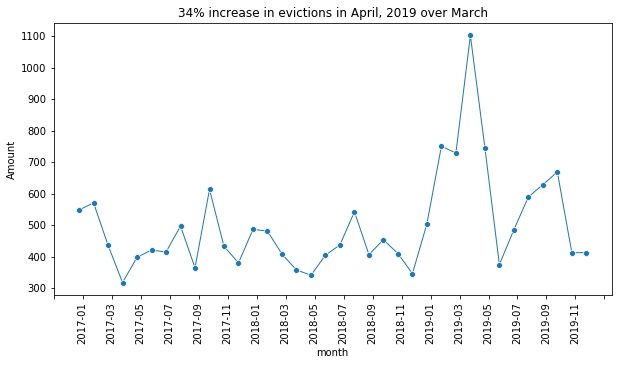

In [307]:
hills_evictions_df = hills_evictions_ts_df2[hills_evictions_ts_df2["type"] == "evictions"]
time_series_plot(hills_evictions_df, "34% increase in evictions in April, 2019 over March", \
                "value")

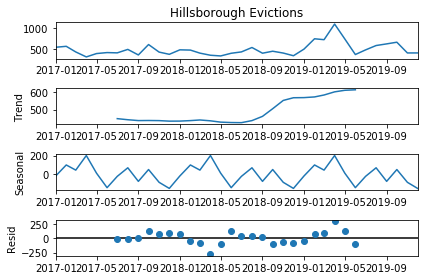

In [320]:
timeeseries_decomp_plot(hills_evictions_df, "value", "Hillsborough Evictions")

Hillsborough Evictions:
Upward trend in evictions started in Feb 2019.
Evictions are seasonal in October and December